In [35]:
#split the date part to year and month
import nbimporter
import sys
import import_ipynb
sys.path.append('../')
from Preprocessing import Train_Test_split as ts
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [36]:
LLM_predicts = pd.read_json('LLM\\llm_sentiment.json', lines=True)

In [37]:
LLM_predicts.iloc[77]

business_id                                 agzEfydzvZWlbzpcMxLPBg
text             This is the worst Starbucks location I have ev...
city                                                          Reno
date                                           2017-07-31 03:53:37
stars_3_scale                                                    1
address                          6890 South McCarran Blvd, Ste 100
llm_sentiment                                          I have been
Name: 77, dtype: object

In [38]:
#pd.to_numeric(LLM_predicts["llm_sentiment"], errors='coerce')
LLM_predicts['llm_sentiment'] = pd.to_numeric(LLM_predicts['llm_sentiment'], errors='coerce')



In [39]:
v = LLM_predicts['llm_sentiment'].value_counts()
v

llm_sentiment
 1.0    10325
 3.0    10011
 2.0     1217
-1.0        1
Name: count, dtype: int64

In [40]:
#negative_or_na = llm_sentiment.jason[llm_sentiment.jason["llm_sentiment"].isna() | (llm_sentiment.json["llm_sentiment"] < 0)]
#negative_or_na

In [41]:
LLM_predicts = LLM_predicts.dropna(subset=["llm_sentiment"])
LLM_predicts = LLM_predicts[LLM_predicts["llm_sentiment"] >= 0]
LLM_predicts

,business_id,text,city,date,stars_3_scale,address,llm_sentiment
0,aJvxWyQIG5OLfBw3qAe8xA,"Ordered Caramel frappe at Drive thru, BIG MIST...",Nashville,2017-12-29 19:38:31,1,2308 Murfreesboro Pike,1.0
1,MjZQqZAmJeMco_Vq-Y9h-g,Drum-roll please! Review #100 coming right up!...,Carmel,2014-02-05 19:38:24,3,13170 North Hazel Dell Pkwy,3.0
2,u7MJKcNdZXYyTeb67vD5jw,We stopped here for my Chai and Hubby's coffee...,Mount Laurel,2017-02-09 04:35:39,3,5 Hartford Rd,3.0
3,saJFbz12EnzanelpD8_xXQ,There's been three times that I've ordered a g...,Riverview,2016-08-25 14:08:18,1,10716 Big Bend Rd,1.0
4,KiE0h68HGOO7ZXAqkMBdiw,"I went in when they had 4 people working, wait...",Santa Barbara,2016-01-30 01:10:42,1,1015 De La Vina St,1.0
...,...,...,...,...,...,...,...
21570,-85kJMtb9wqNWDT8yLbitw,Fair service- messed up my drink cuppa times....,Franklin,2021-12-13 22:08:14,2,"438 Main St, Space 168, Space 168",1.0
21571,Ddg-J_j0YFErk7wpMtH_0A,On my way out of Reno last week I noted a new ...,Reno,2021-12-28 19:26:37,3,986 Ambassador Dr,3.0
21572,2rmpfdyV2POqpXtmPHO_IQ,always closing drive thru. i've driven here so...,Tucson,2021-12-28 18:12:04,1,6363 N La Cholla,1.0
21573,GxuxCctcz3Hyk0wnuly7vQ,This is now one of two Starbucks in the shoppi...,Tucson,2017-01-21 00:19:27,3,4811 E Grant,3.0


In [42]:
LLM_predicts_merge_roberta = pd.merge(LLM_predicts, ts.BI_df[["roberta_score", "date", "business_id"]], on=["date", "business_id"], how="inner")
LLM_predicts_merge_roberta

,business_id,text,city,date,stars_3_scale,address,llm_sentiment,roberta_score
0,aJvxWyQIG5OLfBw3qAe8xA,"Ordered Caramel frappe at Drive thru, BIG MIST...",Nashville,2017-12-29 19:38:31,1,2308 Murfreesboro Pike,1.0,2
1,MjZQqZAmJeMco_Vq-Y9h-g,Drum-roll please! Review #100 coming right up!...,Carmel,2014-02-05 19:38:24,3,13170 North Hazel Dell Pkwy,3.0,3
2,u7MJKcNdZXYyTeb67vD5jw,We stopped here for my Chai and Hubby's coffee...,Mount Laurel,2017-02-09 04:35:39,3,5 Hartford Rd,3.0,3
3,saJFbz12EnzanelpD8_xXQ,There's been three times that I've ordered a g...,Riverview,2016-08-25 14:08:18,1,10716 Big Bend Rd,1.0,2
4,KiE0h68HGOO7ZXAqkMBdiw,"I went in when they had 4 people working, wait...",Santa Barbara,2016-01-30 01:10:42,1,1015 De La Vina St,1.0,1
...,...,...,...,...,...,...,...,...
21548,-85kJMtb9wqNWDT8yLbitw,Fair service- messed up my drink cuppa times....,Franklin,2021-12-13 22:08:14,2,"438 Main St, Space 168, Space 168",1.0,1
21549,Ddg-J_j0YFErk7wpMtH_0A,On my way out of Reno last week I noted a new ...,Reno,2021-12-28 19:26:37,3,986 Ambassador Dr,3.0,3
21550,2rmpfdyV2POqpXtmPHO_IQ,always closing drive thru. i've driven here so...,Tucson,2021-12-28 18:12:04,1,6363 N La Cholla,1.0,1
21551,GxuxCctcz3Hyk0wnuly7vQ,This is now one of two Starbucks in the shoppi...,Tucson,2017-01-21 00:19:27,3,4811 E Grant,3.0,3


In [51]:
df = LLM_predicts_merge_roberta[(LLM_predicts_merge_roberta["llm_sentiment"] == 1.0) & (LLM_predicts_merge_roberta["roberta_score"] == 2)]
df = df[["text", "llm_sentiment", "roberta_score"]]
df

#df.to_json('example_neutral_llm.json', orient='records', lines=True)

,text,llm_sentiment,roberta_score
0,"Ordered Caramel frappe at Drive thru, BIG MIST...",1.0,2
3,There's been three times that I've ordered a g...,1.0,2
8,Starbucks...so aren't they all just clones? a...,1.0,2
37,I'm a partner so I know the standards and I'm ...,1.0,2
75,Setting aside my expectations of a barista gre...,1.0,2
...,...,...,...
21398,Faster to stay in the drive thru back out to t...,1.0,2
21472,I was in the downtown area taking night photos...,1.0,2
21508,Starbucks needs to get with the program at eac...,1.0,2
21515,"1 barista, 3 people on register and 10 people ...",1.0,2


In [55]:
df1 = LLM_predicts_merge_roberta[LLM_predicts_merge_roberta["text"].str.contains("Starbucks Haiku:\n\nBurnt beans yet none care\nRestroom code is 12-60\nGuy always hogs chair")]
df1

,business_id,text,city,date,stars_3_scale,address,llm_sentiment,roberta_score
226,mBcvp7NarEQEviJyRiX23Q,Starbucks Haiku:\n\nBurnt beans yet none care\...,Philadelphia,2017-05-16 16:45:03,1,57-63 North Third St,1.0,2


In [56]:
Bow = pd.read_json('BOW\\BOW_predictions.json', lines=True)
LLM_predicts_merge_roberta_bow = pd.merge(LLM_predicts_merge_roberta, Bow[["bow_predicted_sentiment", "date", "business_id"]], on=["date", "business_id"], how="inner")
LLM_predicts_merge_roberta_bow

,business_id,text,city,date,stars_3_scale,address,llm_sentiment,roberta_score,bow_predicted_sentiment
0,aJvxWyQIG5OLfBw3qAe8xA,"Ordered Caramel frappe at Drive thru, BIG MIST...",Nashville,2017-12-29 19:38:31,1,2308 Murfreesboro Pike,1.0,2,1
1,MjZQqZAmJeMco_Vq-Y9h-g,Drum-roll please! Review #100 coming right up!...,Carmel,2014-02-05 19:38:24,3,13170 North Hazel Dell Pkwy,3.0,3,3
2,u7MJKcNdZXYyTeb67vD5jw,We stopped here for my Chai and Hubby's coffee...,Mount Laurel,2017-02-09 04:35:39,3,5 Hartford Rd,3.0,3,3
3,saJFbz12EnzanelpD8_xXQ,There's been three times that I've ordered a g...,Riverview,2016-08-25 14:08:18,1,10716 Big Bend Rd,1.0,2,3
4,KiE0h68HGOO7ZXAqkMBdiw,"I went in when they had 4 people working, wait...",Santa Barbara,2016-01-30 01:10:42,1,1015 De La Vina St,1.0,1,1
...,...,...,...,...,...,...,...,...,...
21548,-85kJMtb9wqNWDT8yLbitw,Fair service- messed up my drink cuppa times....,Franklin,2021-12-13 22:08:14,2,"438 Main St, Space 168, Space 168",1.0,1,1
21549,Ddg-J_j0YFErk7wpMtH_0A,On my way out of Reno last week I noted a new ...,Reno,2021-12-28 19:26:37,3,986 Ambassador Dr,3.0,3,3
21550,2rmpfdyV2POqpXtmPHO_IQ,always closing drive thru. i've driven here so...,Tucson,2021-12-28 18:12:04,1,6363 N La Cholla,1.0,1,1
21551,GxuxCctcz3Hyk0wnuly7vQ,This is now one of two Starbucks in the shoppi...,Tucson,2017-01-21 00:19:27,3,4811 E Grant,3.0,3,3


In [59]:
df = []
df = LLM_predicts_merge_roberta_bow[(LLM_predicts_merge_roberta_bow["llm_sentiment"] == 2.0) & (LLM_predicts_merge_roberta_bow["roberta_score"] == 2) & (LLM_predicts_merge_roberta_bow["bow_predicted_sentiment"] == 1)]
df = df[["text", "bow_predicted_sentiment","llm_sentiment", "roberta_score"]]
df
#df.to_json('example_neutral_llm.json', orient='records', lines=True)

,text,bow_predicted_sentiment,llm_sentiment,roberta_score
1435,First of all the staff is courteous.\nThe clea...,1,2.0,2
1577,For the most part this location does a decent ...,1,2.0,2
1751,I was initially at the Bread and Company next ...,1,2.0,2
1952,When you have to work all day and then come he...,1,2.0,2
2098,I have a love/ hate relationship with this Sta...,1,2.0,2
...,...,...,...,...
19884,You can tell it used to be a Burger King. Stan...,1,2.0,2
20412,Hold it. I know I have reviewed here! \n\nI d...,1,2.0,2
20418,This is my local starbucks but I tend to go to...,1,2.0,2
20488,I really like that this Starbucks opened in Ri...,1,2.0,2


In [44]:
LLM_predicts_merge_roberta.to_json('LLM_predicts_merge_roberta.json', orient='records', lines=True)

In [45]:
print(classification_report(LLM_predicts_merge_roberta["roberta_score"], LLM_predicts_merge_roberta['llm_sentiment']))

              precision    recall  f1-score   support

           1       0.84      0.97      0.90      8927
           2       0.16      0.16      0.16      1216
           3       0.97      0.85      0.91     11410

    accuracy                           0.86     21553
   macro avg       0.66      0.66      0.66     21553
weighted avg       0.87      0.86      0.86     21553



In [46]:
print(confusion_matrix(LLM_predicts_merge_roberta["roberta_score"], LLM_predicts_merge_roberta['llm_sentiment']))

[[8644  167  116]
 [ 821  199  196]
 [ 860  851 9699]]


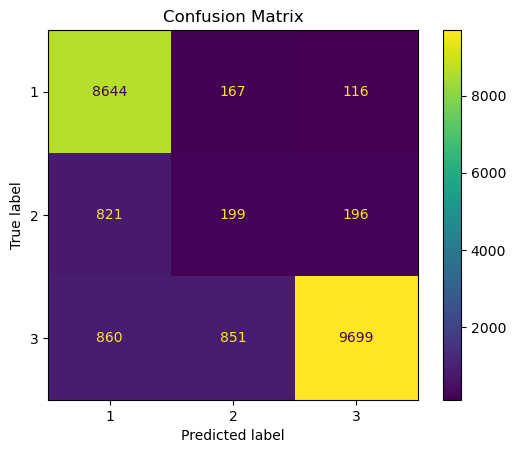

In [47]:
ConfusionMatrixDisplay.from_predictions(LLM_predicts_merge_roberta["roberta_score"], LLM_predicts_merge_roberta['llm_sentiment'])#, display_labels=labels)
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           1       0.84      0.97      0.90      8930
           2       0.17      0.18      0.17      1216
           3       0.97      0.85      0.91     11410

    accuracy                           0.86     21556
   macro avg       0.66      0.67      0.66     21556
weighted avg       0.87      0.86      0.86     21556



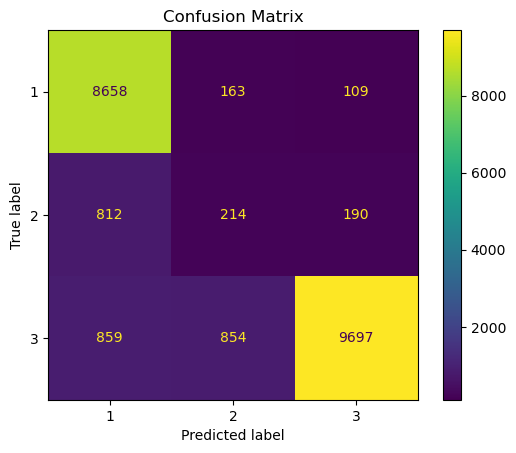

In [48]:
LLM_temp0_1 = pd.read_json('llm_sentiment_temp0_1.json', lines=True)
LLM_temp0_1['llm_sentiment'] = pd.to_numeric(LLM_temp0_1['llm_sentiment'], errors='coerce')
LLM_temp0_1 = LLM_temp0_1.dropna(subset=["llm_sentiment"])
LLM_temp0_1 = LLM_temp0_1[LLM_temp0_1["llm_sentiment"] >= 0]
LLM_temp0_1_merge_roberta = pd.merge(LLM_temp0_1, ts.BI_df[["roberta_score", "date", "business_id"]], on=["date", "business_id"], how="inner")
print(classification_report(LLM_temp0_1_merge_roberta["roberta_score"], LLM_temp0_1_merge_roberta['llm_sentiment']))
ConfusionMatrixDisplay.from_predictions(LLM_temp0_1_merge_roberta["roberta_score"], LLM_temp0_1_merge_roberta['llm_sentiment'])#, display_labels=labels)
plt.title('Confusion Matrix')
plt.show()

In [49]:
LLM_temp0_1_merge_roberta.to_json('LLM_temp0_1_merge_roberta.json', orient='records', lines=True)

              precision    recall  f1-score   support

           1       0.84      0.97      0.90      8928
           2       0.17      0.18      0.18      1216
           3       0.97      0.85      0.90     11407

    accuracy                           0.86     21551
   macro avg       0.66      0.67      0.66     21551
weighted avg       0.87      0.86      0.86     21551



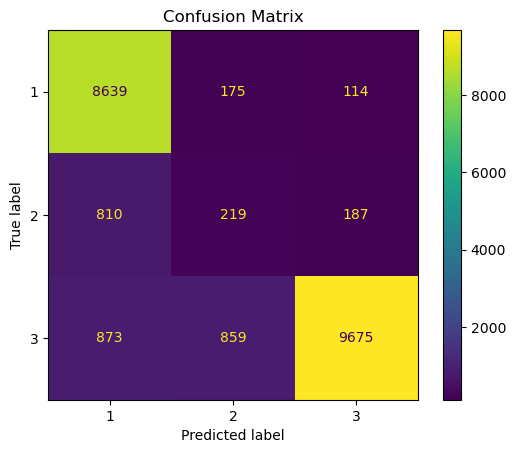

In [50]:
LLM_temp0_2 = pd.read_json('llm_sentiment_temp0_2.json', lines=True)
LLM_temp0_2['llm_sentiment'] = pd.to_numeric(LLM_temp0_2['llm_sentiment'], errors='coerce')
LLM_temp0_2 = LLM_temp0_2.dropna(subset=["llm_sentiment"])
LLM_temp0_2 = LLM_temp0_2[LLM_temp0_2["llm_sentiment"] >= 0]
LLM_temp0_2_merge_roberta = pd.merge(LLM_temp0_2, ts.BI_df[["roberta_score", "date", "business_id"]], on=["date", "business_id"], how="inner")
print(classification_report(LLM_temp0_2_merge_roberta["roberta_score"], LLM_temp0_2_merge_roberta['llm_sentiment']))
ConfusionMatrixDisplay.from_predictions(LLM_temp0_2_merge_roberta["roberta_score"], LLM_temp0_2_merge_roberta['llm_sentiment'])#, display_labels=labels)
plt.title('Confusion Matrix')
plt.show()